#### Boot cell

Skip if `module_update.py` is in same folder as notebook, next cell downloads this file which in turn will download other files.

In [2]:
! curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

#### Get essentials

Import text and graph modules for analysis, and css for display

In [3]:
from module_update import update, css, code_toggle, printmd

In [4]:
css()

### Start med å importere modulene

In [58]:
update('graph_networkx_louvain', overwrite=True)
update('nbtext', overwrite=True)
import nbtext as nb
import graph_networkx_louvain as gnl
import networkx as nx
from graph_networkx_louvain import cutdown, make_collocation_graph
import matplotlib.pyplot as plt
from collections import Counter

Updated file `C:\Users\larsj\Documents\GitHub\Miscellaneous-Notebooks\graph_networkx_louvain.py`

Updated file `C:\Users\larsj\Documents\GitHub\Miscellaneous-Notebooks\nbtext.py`

In [155]:
import requests

def ngram(word, corpus='bok', period=(1800, 2000)):
    r = requests.get("https://api.nb.no/ngram/ngram", 
                     params =
                     {
                         'word':word, 
                         'corpus':corpus,
                         'yearfrom':period[0],
                         'yearto':period[1]
                     })
    return r.json()
    

In [178]:
s = ngram('Norden', period=(1750, 1920))

In [179]:
ska = ngram('Skandinavia', period=(1750, 1920))
sken = ngram('Skandinavien', period = (1750, 1920))


In [195]:
scen = ngram('Scandinavien', period = (1750, 1920))

In [196]:
sk = pd.DataFrame()
sk['ska'] = pd.Series(dict(ska))
sk['sken'] = pd.Series(dict(sken))
sk['scen'] = pd.Series(dict(scen))

In [197]:
SN = pd.DataFrame()
SN['Norden'] = pd.Series(dict(s))
SN['Skandinavien'] = sk.fillna(0).sum(axis=1)

In [198]:
sk

ska   sken   scen
1771    7  107.0    2.0
1809    1    NaN    NaN
1812    1    1.0    NaN
1814    4    6.0    1.0
1820    1    3.0    1.0
1821    1   13.0   28.0
1824    1    6.0    NaN
1828    1    1.0    NaN
1830    3    2.0    NaN
1833    1   10.0    1.0
1837    1    2.0    2.0
1838    1    7.0    1.0
1849    1   27.0    NaN
1850    2   29.0    NaN
1852   10   19.0    1.0
1853    5   27.0   19.0
1857    1   28.0    6.0
1860   48   37.0    3.0
1861    1   13.0    4.0
1863    4   38.0    2.0
1865   27   72.0    NaN
1868    2   23.0    NaN
1870    2   13.0    NaN
1872    4    9.0    NaN
1873    2   69.0  121.0
1874    1   58.0    NaN
1875    6   72.0    1.0
1877    2   41.0    1.0
1878    1   76.0    1.0
1881    1   83.0    4.0
1885    5   57.0    9.0
1888    2   54.0    1.0
1889    2   36.0    NaN
1892    2   76.0    2.0
1893    1   83.0    2.0
1894    1   55.0    NaN
1897    3  160.0    9.0
1899    3  149.0    1.0
1900    6  131.0    2.0
1901    4  108.0    3.0
1903    1   80.0    1.0
1904    3  176.0    1.0
1905    2  130.0    1.0
1907    3  113.0    NaN
1908    7  227.0   17.0
1909    2  107.0    1.0
1910    1   90.0    3.0
1911    4  200.0    NaN
1912    3  144.0    4.0
1913    3  113.0    NaN
1914   13  260.0    5.0
1915    2  160.0    2.0
1916    6  130.0    2.0
1917    6  302.0    9.0
1918  101  121.0    7.0
1919    7  164.0    NaN
1920    8  162.0    NaN

In [183]:
SN

Norden  Skandinavien
1750     185           NaN
1751      72           NaN
1752      61           NaN
1753     255           NaN
1754      48           NaN
1755      27           NaN
1756      11           NaN
1757     322           NaN
1758      72           NaN
1759     145           NaN
1760      94           NaN
1761     126           NaN
1762     265           NaN
1763     165           NaN
1764      79           NaN
1765      43           NaN
1766      93           NaN
1767      12           NaN
1768      67           NaN
1769     647           NaN
1770     113           NaN
1771     961         114.0
1772      10           NaN
1773     114           NaN
1774     130           NaN
1775      28           NaN
1776      74           NaN
1777     777           NaN
1778     118           NaN
1779     401           NaN
...      ...           ...
1891     743           NaN
1892     799          78.0
1893     390          84.0
1894     431          56.0
1895     601           NaN
1896     569           NaN
1897    1053         163.0
1898     638           NaN
1899     703         152.0
1900     827         137.0
1901     696         112.0
1902     769           NaN
1903    1156          81.0
1904    1196         179.0
1905    1037         132.0
1906    1058           NaN
1907    1058         116.0
1908     959         234.0
1909    1200         109.0
1910     747          91.0
1911     786         204.0
1912     885         147.0
1913     572         116.0
1914    1605         273.0
1915     634         162.0
1916     715         136.0
1917     709         308.0
1918     599         222.0
1919     852         171.0
1920     944         170.0

[171 rows x 2 columns]

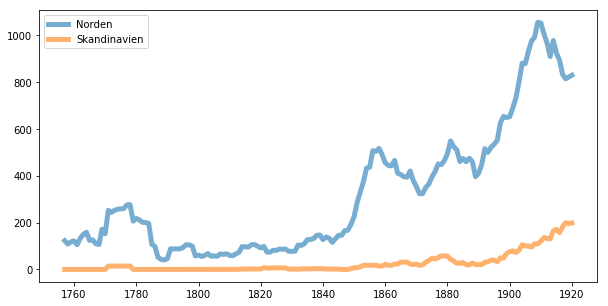

In [199]:
SN.fillna(0).rolling(window=8).mean().plot(figsize=(10,5), lw=5, alpha = 0.60)
plt.savefig('norden-skandinavien.jpg', dpi=300)

# Aggregerte data, trendlinjer og ordmodeller fra ngram




### Trendlinjer 

Data inntil trigram.

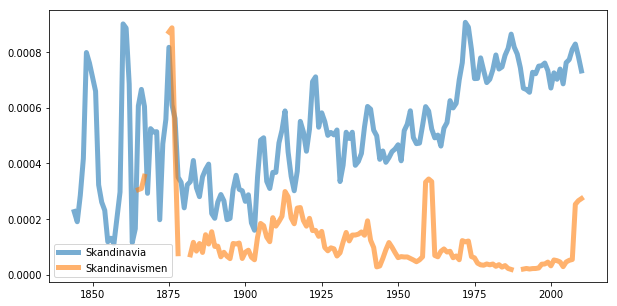

In [154]:
n = nb.nb_ngram("Norden",  years=(1840, 2010), smooth=1)['Norden']
s = nb.nb_ngram("skandinavia, skandinavien", years=(1840, 2010), smooth=1).sum(axis=1)  
sv = nb.nb_ngram("skandinavisme, skandinavismen", years=(1840, 2010), smooth=1).sum(axis=1)
sn = pd.DataFrame()
#sn['Norden'] = n
sn['Skandinavia'] = s
sn['Skandinavismen'] = sv
sn.rolling(window=3).mean().plot(figsize=(10,5), lw=5, alpha = 0.60)
plt.savefig('norden-skandinavia.jpg', dpi=300)

In [191]:
x = nb.nb_ngram("Ytringsfrihet, Ytringsfrihed", 
            years=(1820, 2010), smooth=1, corpus='avis')
y = nb.nb_ngram("offentlighet, offentlighed",  corpus='avis', years=(1820, 2010), smooth=1)
df = pd.DataFrame()
df['Ytringsfrihet'] = x.sum(axis = 1)
df['Offentlighet'] = y.sum(axis = 1)

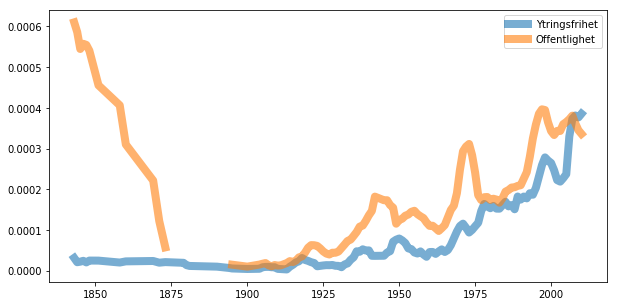

In [192]:
df.rolling(window=5).mean().plot(figsize=(10,5), lw=8, alpha = 0.60)
plt.savefig('ytring-offentlighet-avis.jpg', dpi=300)

In [193]:
x = nb.nb_ngram("Ytringsfrihet, Ytringsfrihed", 
            years=(1820, 2010), smooth=12)
y = nb.nb_ngram("offentlighet, offentlighed",  years=(1820, 2010), smooth=12)
df = pd.DataFrame()
df['Ytringsfrihet'] = x.sum(axis = 1)
df['Offentlighet'] = y.sum(axis = 1)

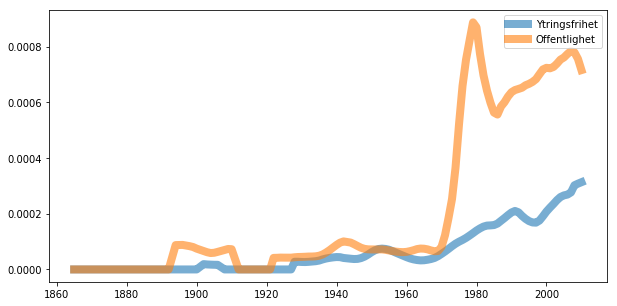

In [194]:
df.plot(figsize=(10,5), lw=8, alpha = 0.60)
plt.savefig('ytring-offentlighet-bok.jpg', dpi=300)

### Ordmodeller

Enkeltord - kapitaliseringssensitiv

In [91]:
a = nb.serie_cluster('offentlighet',1960, 1990, 4)

1960 1963
1964 1967
1968 1971
1972 1975
1976 1979
1980 1983
1984 1987
1988 1991


In [217]:
Off = nb.Cluster('Offentlighed', period=(1800, 1900))

In [233]:
Off_bok = nb.Cluster('Offentlighed', period=(1800, 1900), corpus='bok')

In [234]:
Off_bok.cluster_set()

In [224]:
data = Off.cluster_set(aslist=False)

In [226]:
nb.normalize_corpus_dataframe(data)

True

In [237]:
multer = nb.Cluster("Multer", period=(1850, 1880))

In [238]:
multer_bok = nb.Cluster("Multer", period=(1850,1880),corpus='bok')

In [239]:
multer.cluster_set()

In [240]:
multer_bok.cluster_set()

In [220]:
Off_en.cluster_set()

In [101]:
for i in a:
    print()
    print(i, ', '.join(list(a[i].cluster_set(top=50, aslist=False).index)))


1960 full, den, omkring, all, amerikanske, britiske, norske, forvaltningen, vesttyske, om, større, engelske, tyske, vest-tyske, saken, kommunale, mulig, krav, kjent, saker, straffesaker, Full, foregå, Avisene, rystet, tjent, saksbehandlingen, presse, størst, lovfeste, opprørt, Saken, prinsippet, syn, under, forklare, Større, administrasjonen, avgitt, betenkning, britisk, undersøkes, flertallet, ikke, skandalen, utspring, bergenske, foreldre, garnet, belgiske

1964 full, forvaltningen, større, om, forvaltning, den, kommunale, omkring, all, amerikanske, saker, mer, spørsmålet, mulig, Full, i, storre, Større, britiske, regelen, brede, gjennomført, presse, åpenhet, grad, pressen, prinsippet, kravet, lov, tyske, utvidet, Regjeringen, unntaket, saken, størst, vest-tyske, vesttyske, danske, fylkesforvaltningen, skape, administrasjonen, utvikle, utkast, innføre, norske, alminnelig, bidra, sovjetiske, hemmeligstempling, kommuneforvaltningen

1968 forvaltningen, om, full, loven, lov, større, om

In [117]:
offentlighet = pd.DataFrame({i:a[i].cluster_set(top=100, aslist=False)['offentlighet'] for i in a})

In [118]:
nb.heatmap(pd.DataFrame(offentlighet).sort_values(by=1988, ascending=False)[:20])

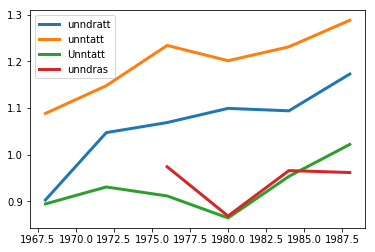

In [202]:
offentlighet.loc[['unndratt', 'unntatt', 'Unntatt', 'unndras']].transpose().plot(lw=3)
plt.savefig('unntagelser_for_offentlighet.jpg', dpi=300)

offentlighet
full                  1.364301
den                   1.244021
omkring               1.146085
all                   1.142593
amerikanske           1.135438
britiske              1.069591
norske                1.048859
forvaltningen         1.038517
vesttyske             1.030807
om                    1.029126
større                1.027999
engelske              1.022524
tyske                 1.019042
vest-tyske            1.017613
saken                 1.003546
kommunale             0.997738
mulig                 0.989955
krav                  0.985997
kjent                 0.981827
saker                 0.981357
straffesaker          0.974567
Full                  0.974560
foregå                0.973521
Avisene               0.972284
rystet                0.969295
tjent                 0.968607
saksbehandlingen      0.963957
presse                0.963582
størst                0.957370
lovfeste              0.953311
...                        ...
sak                   0.854684
forsonet              0.852230
debatt                0.852107
mulig                 0.851485
renvaske              0.851214
forholdet             0.850567
skje                  0.850037
innholdet             0.848387
kritisk               0.848318
slike                 0.847259
brent                 0.845394
unntak                0.844882
kravet                0.844177
politiske             0.843760
tilsettingssaker      0.843238
undratt               0.843238
kildevern             0.843238
rettspleien           0.843238
dokument              0.842424
mer                   0.841091
lukkede               0.840286
behandles             0.839911
Dokumentet            0.838370
Kredittilsynets       0.838363
mediene               0.838040
ordlyden              0.837546
litterær              0.837028
borgerlige            0.836731
Sollie                0.836150
dokumentene           0.835038

[800 rows x 1 columns]

In [204]:
G = nb.make_graph('offentlighet', cutoff = 10)

C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


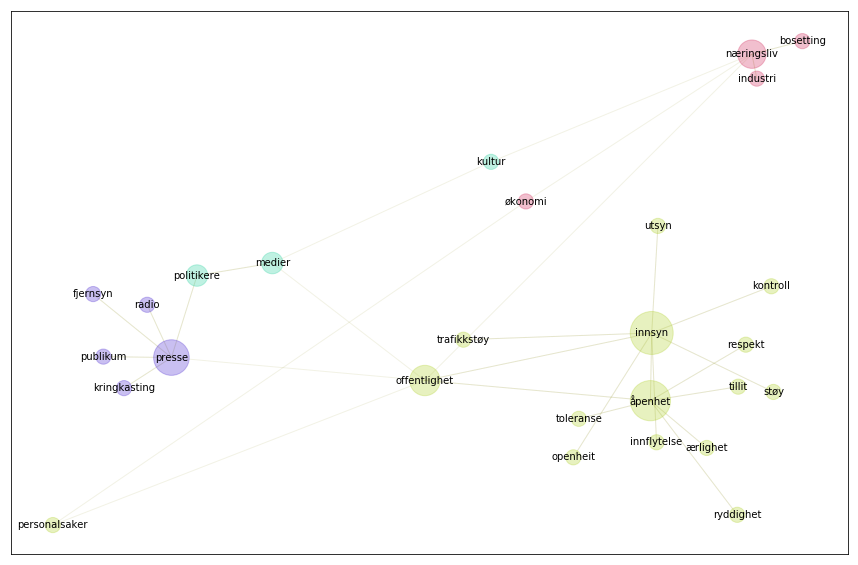

In [205]:
gnl.show_graph(G, spread = 1.3)
plt.savefig('offentlighet.jpg', dpi=300)

In [62]:
G1 = nb.make_graph('Skandinavien', cutoff = 10)

C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


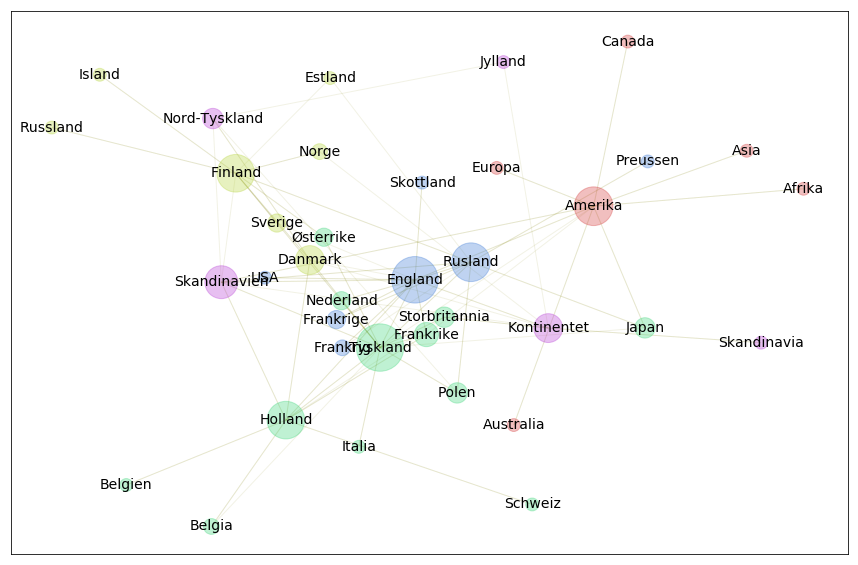

In [65]:
gnl.show_graph(G1, spread = 1.9, fontsize=14)
plt.savefig('Skandinavien.jpg', dpi=300)

In [11]:
G2 = nb.make_graph('Skandinavia, Norden', cutoff = 10)

C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


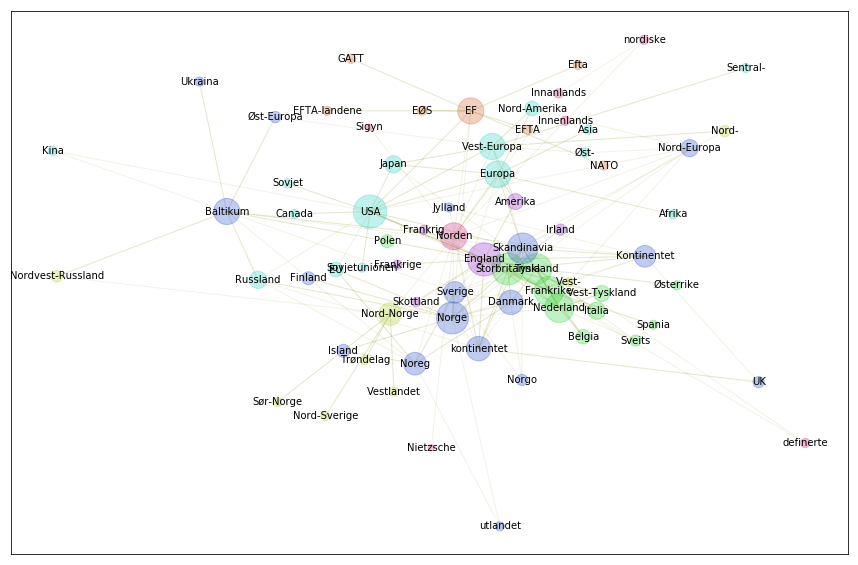

In [12]:
gnl.show_graph(G2, spread = 1.5)

In [13]:
skandinavia = nb.relaterte_ord('Skandinavia', number=50, score=True)

In [207]:
ytringsfrihet = nb.relaterte_ord('ytringsfrihet', number=50, score=True)

In [206]:
offentlighet = nb.relaterte_ord('offentlighet', number=50, score=True)

In [211]:
Offentlighed = nb.relaterte_ord('Offentlighed', number=50, score=True)

In [68]:
norden = nb.relaterte_ord('Norden', number=50, score=True)

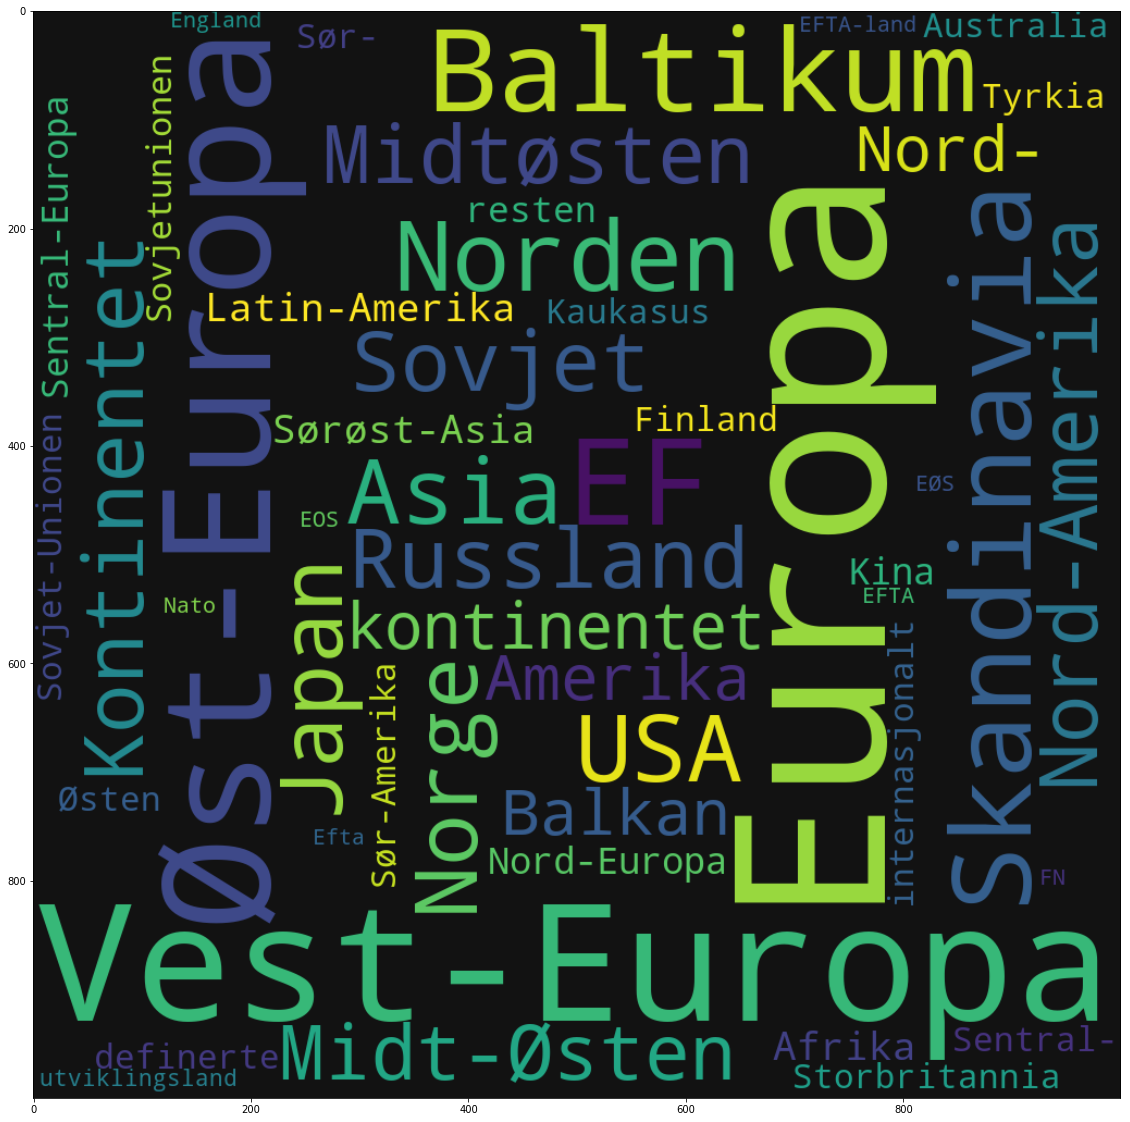

In [70]:
nb.cloud(nb.frame(dict(norden)), background='#121212')
plt.savefig('norden_ordsky.jpg', dpi=300)

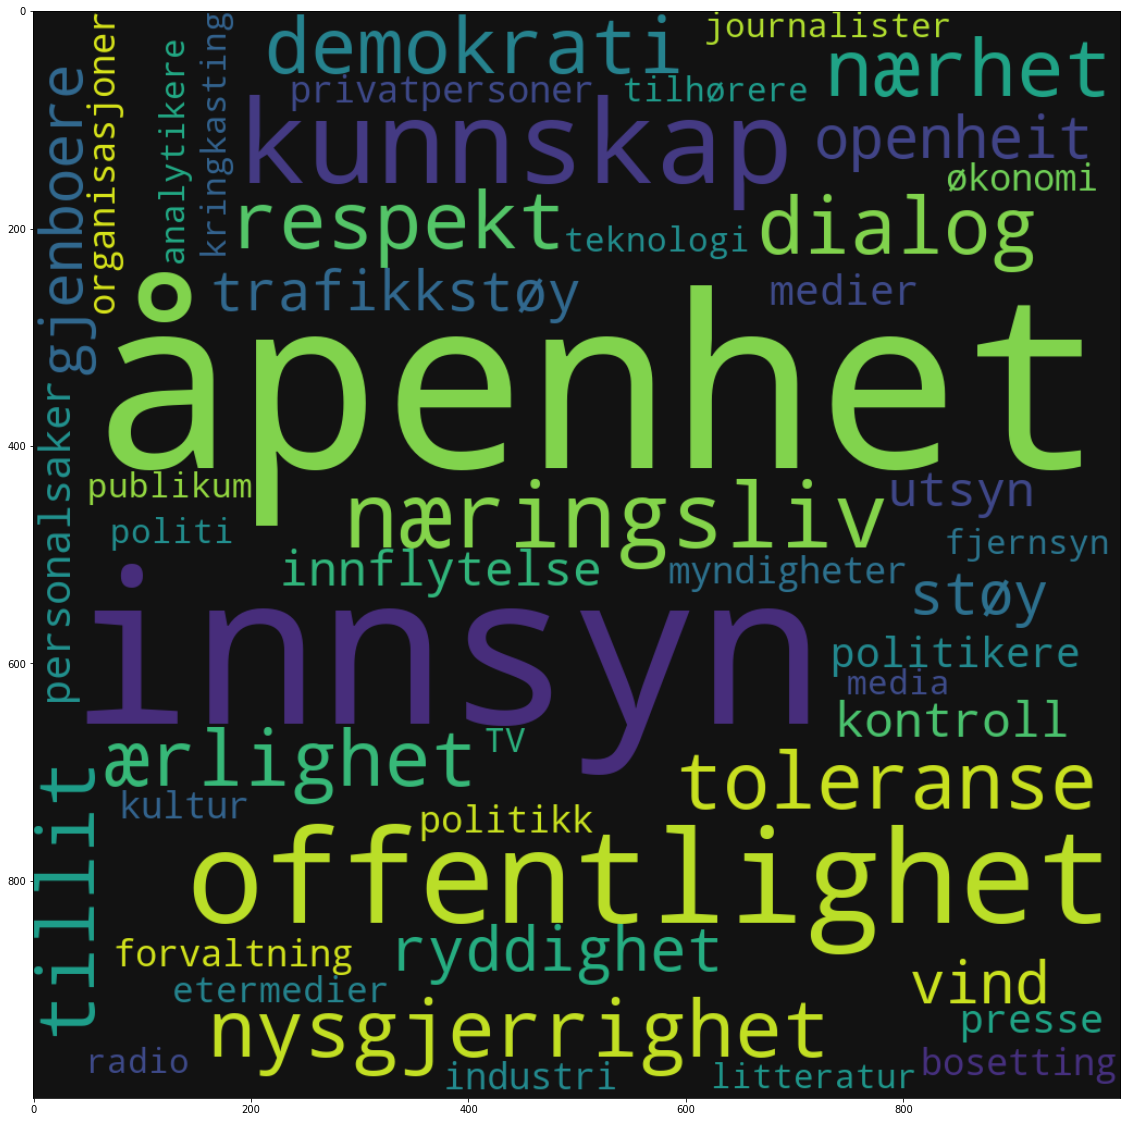

In [208]:
nb.cloud(nb.frame(dict(offentlighet)), background='#121212')
plt.savefig('offentlighet_ordsky.jpg', dpi=300)

In [228]:
data[:10]

Offentlighed
Mundtlighed           0.006413
give                  0.006274
Forhandlingernes      0.006246
den                   0.006229
mulige                0.006098
fuld                  0.006020
Forhandlinger         0.005858
Sagen                 0.005845
storst                0.005839
Kontrol               0.005785

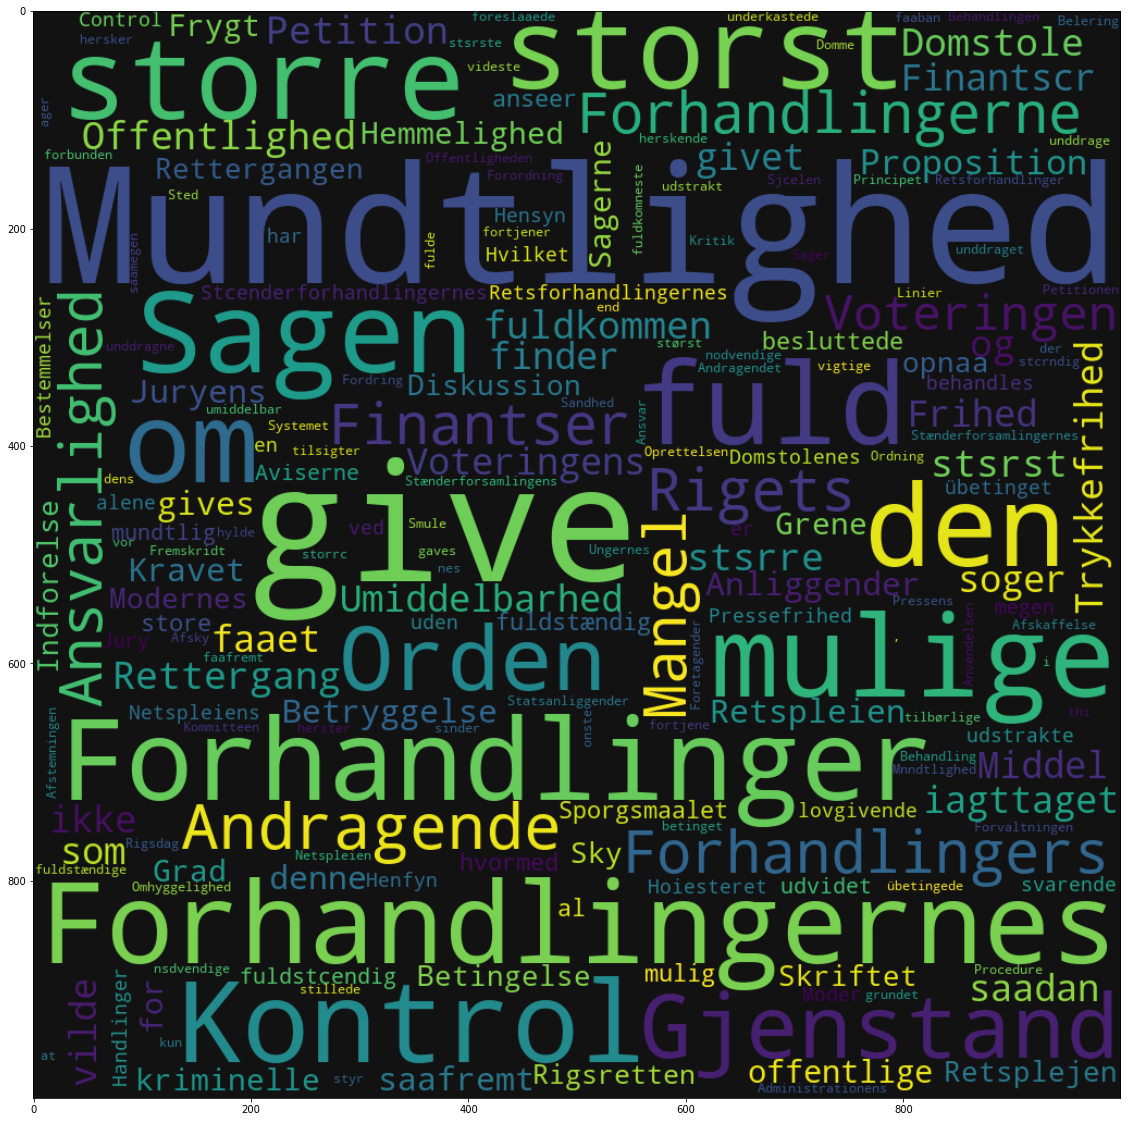

In [232]:
nb.cloud(data, background='#121212')
plt.savefig('Offentlighed_cluster_ordsky.jpg', dpi=300)

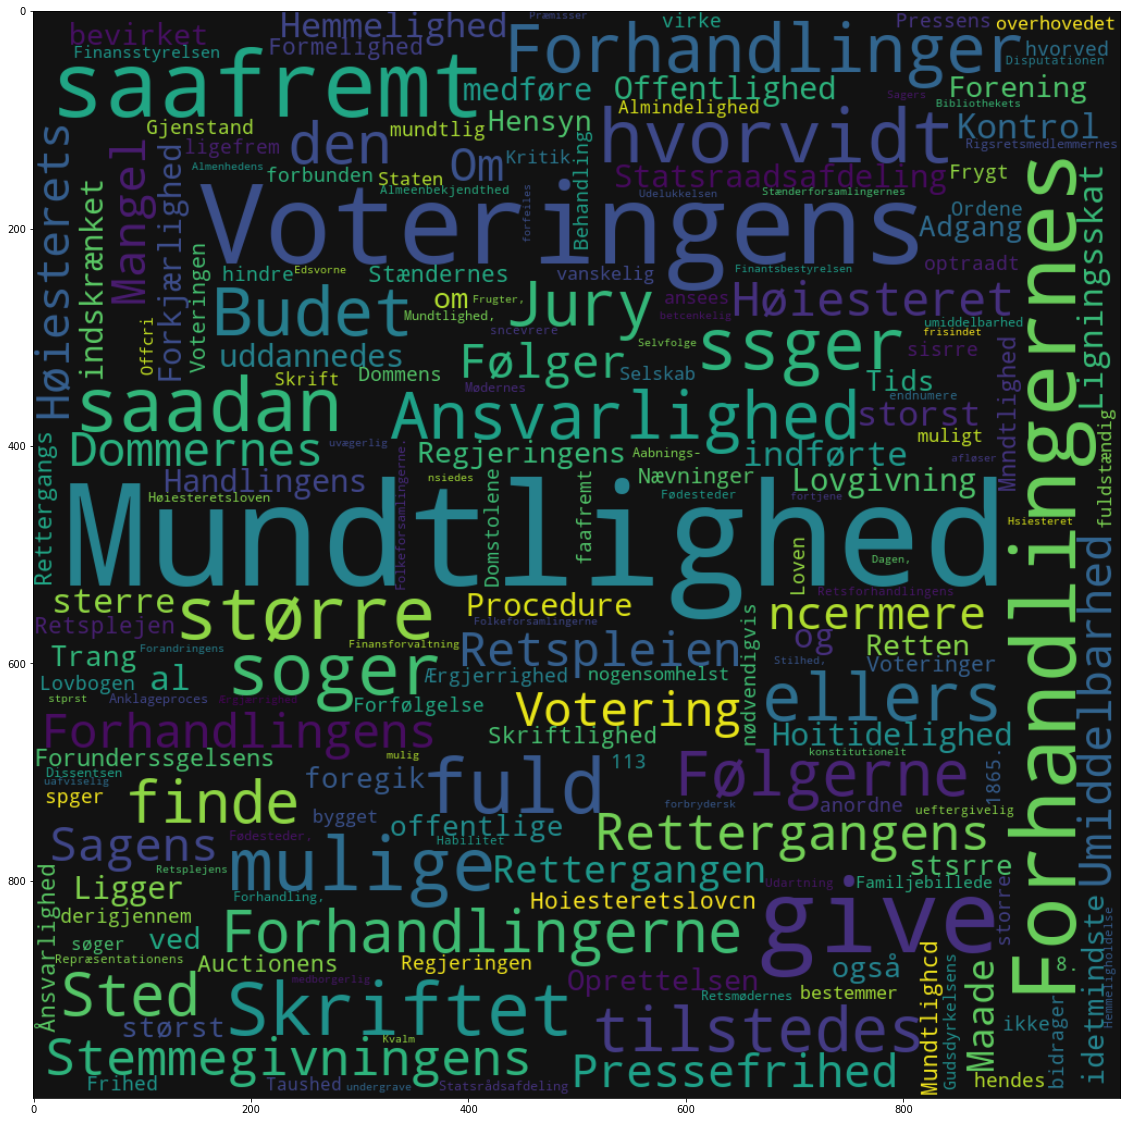

In [236]:
nb.cloud(Off_bok.cluster_set(aslist=False), background='#121212')
plt.savefig('Offentlighed_bokcluster_ordsky.jpg', dpi=300)

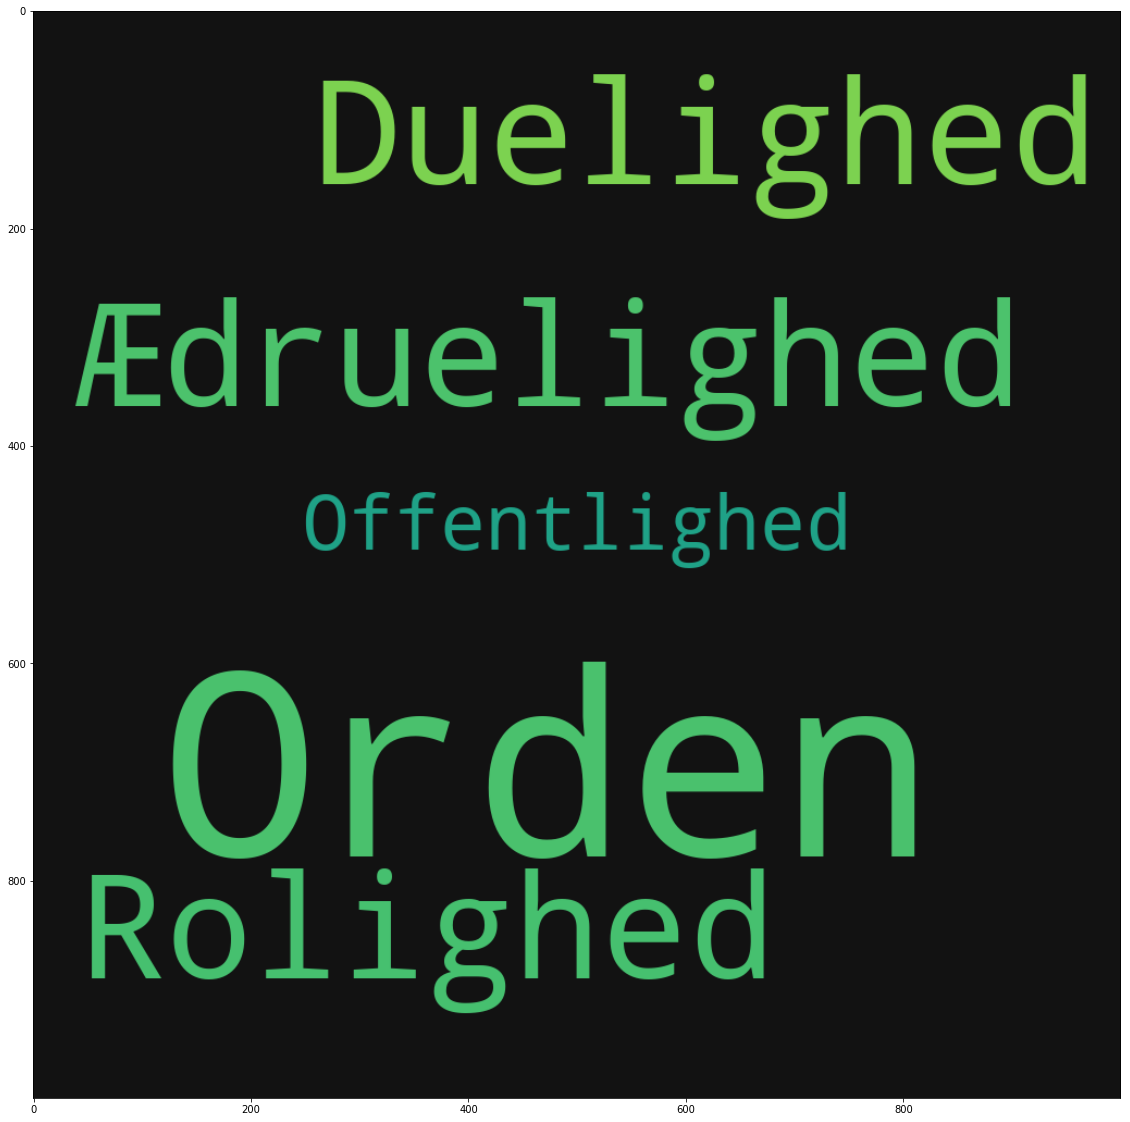

In [213]:
nb.cloud(nb.frame(dict(Offentlighed)), background='#121212')
plt.savefig('Offentlighed_ordsky.jpg', dpi=300)

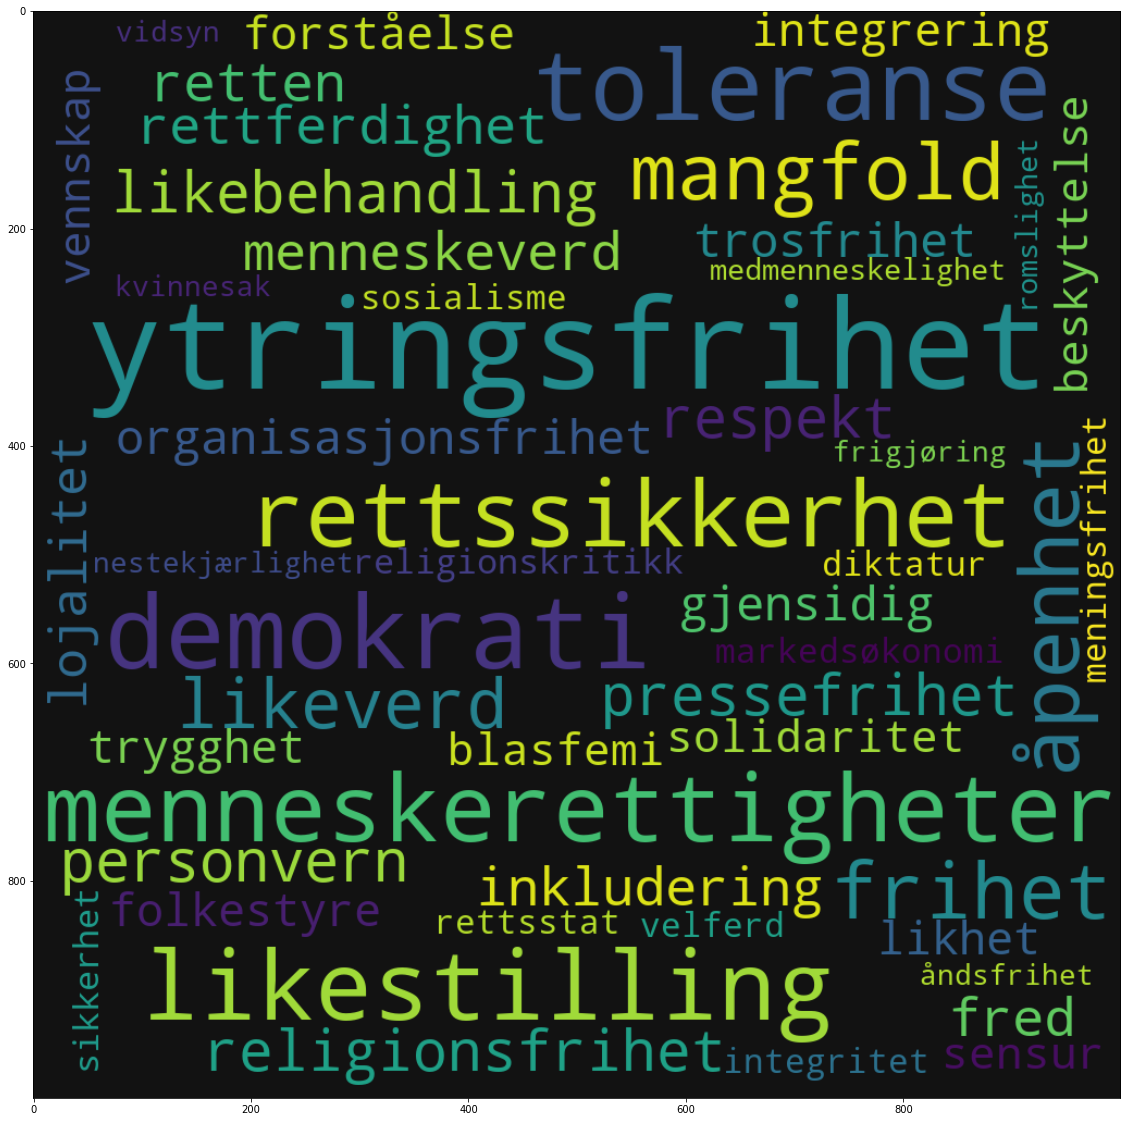

In [209]:
nb.cloud(nb.frame(dict(ytringsfrihet)), background='#121212')
plt.savefig('ytringsfrihet_ordsky.jpg', dpi=300)

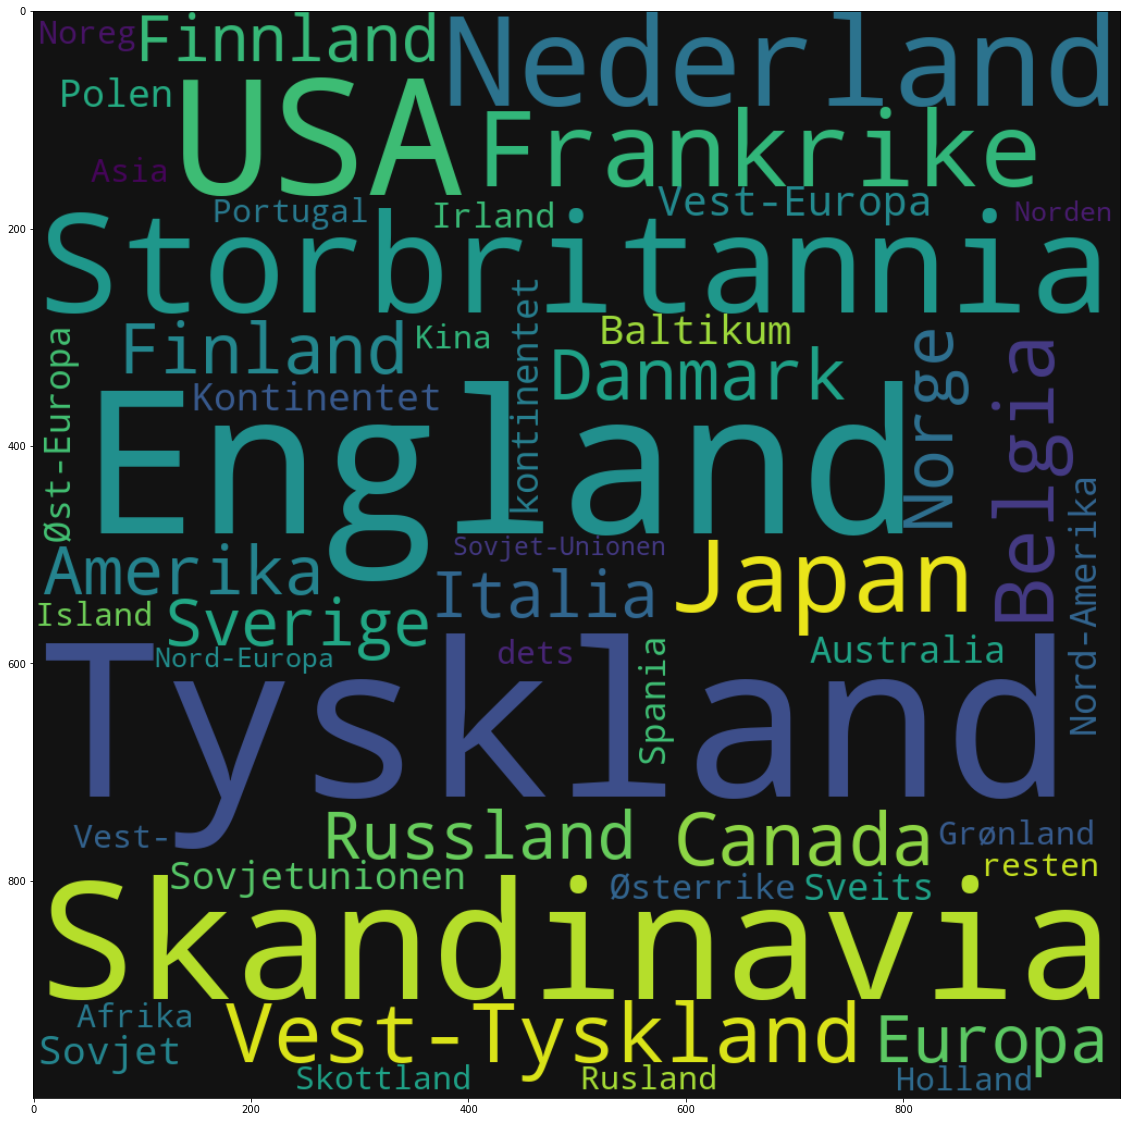

In [71]:
nb.cloud(nb.frame(dict(skandinavia)), background='#121212')
plt.savefig('skandinavia.jpg', dpi=300)

In [17]:
korp_norden = nb.get_urn({'words':['Norden','Nordisk','Nordiske'], 'year':1800, 'next':100, 'limit':200})

In [18]:
ref_1800 = nb.get_urn({'year':1800, 'next':100, 'limit':200})

In [19]:
total = nb.get_aggregated_corpus(ref_1800)

In [20]:
import pandas as pd

In [21]:
totalen = pd.Series(nb.totals(50000))

In [22]:
coll_norden = nb.urn_coll('Norden', urns=korp_norden, before=5, after=5)

In [23]:
(coll_norden[0]/totalen).sort_values( ascending=False)

Syden            0.000960
Familien         0.000290
Munthe           0.000290
Legat            0.000183
Donau            0.000167
Porte            0.000148
fundne           0.000141
Odins            0.000133
Osten            0.000125
Westen           0.000121
udbredt          0.000111
skandinaviske    0.000110
iscrr            0.000107
Reise            0.000098
Udbredelse       0.000097
yderste          0.000093
Enhed            0.000090
Vesten           0.000089
hsit             0.000087
høje             0.000086
godes            0.000085
foljande         0.000084
angive           0.000082
Bjerget          0.000082
Asien            0.000080
Norwegen         0.000080
Schweden         0.000080
Bjerge           0.000077
overste          0.000077
Bde              0.000077
                   ...   
übft                  NaN
übi                   NaN
übrcrndte             NaN
übrigen               NaN
übrigens              NaN
übrukelig             NaN
übrukelige            NaN
übrukt      

In [24]:
norden = nb.Cluster(word='Norden', period=(1850, 1920))

In [25]:
norden30 = nb.Cluster(word='Norden', period=(1920, 1930))

In [26]:
norden30.cluster_set()

In [27]:
norden.cluster_set(exponent=1.2)

# Bygg med biblioteksdata

In [28]:
korpus = nb.get_urn({'ddk':"641%", 'limit':50})
korpus[:5]

[[2011030108026, 'Uffe', 'Helt rått', 2000],
 [2009011900026, 'Rinker, Eva Haukeberg', 'Tex-Mex', 1997],
 [2013062038072, 'Lousada, Patricia', 'Tidens lille konfektbok', 1985],
 [2016022548133, 'Jackson, Michael', 'Maltwhisky', 2000],
 [2014062307155, '', 'Halloween', 2000]]

Ta et uttrekk av setninger

In [29]:
Sentences = nb.sentences(korpus, num = 1000)
Sentences[:10]

['Så tilsettes smør , sukker , salt og saften av 1 / 2 sitron , og sausen beveges over varmen til smøret er fullstendig smeltet',
 'Rør gradvis inn marengsmassen , en skje av gangen , og til alt er godt blandet',
 'Bland dette godt sammen til osten nesten ikke merkes i deigen , omtrent ti minutter for hånd eller fem minutter i maskin',
 'Dietter som har gått i arv gjennom generasjoner , har vist seg å være bra , ihvertfall til en viss grad - man har jo tross alt overlevd på dem',
 'Pynt med en mandarinbåt og et halvt cocktailbær',
 'Kapittel 3',
 'De er så uregelmessige i formen at skrellingen nødvendigvis blir tidkrevende',
 'MALTOSE',
 'Bruk samme fremgangsmåte til den mørke deigen',
 'Tilsett kulene i fiskekraften og rør til sausen blir jevn og glatt']

Setningene er ferdig tokenisert, så en .split() holder for å hente ut tokener.

In [30]:
SCount = Counter()
for s in Sentences:
    SCount.update(s.split())

Se på de mest frekvente

In [31]:
SCount.most_common(10)

[(',', 417),
 ('og', 407),
 ('i', 277),
 ('med', 180),
 ('en', 160),
 ('er', 150),
 ('til', 136),
 ('på', 131),
 ('av', 124),
 ('som', 102)]

Sammenlign med totalen av ord

In [32]:
# den her tar litt tid ...
tot = nb.totals(top=20000)

Inneholder alle ordene fra bøker i NB-digital

In [33]:
totalen = nb.frame(tot)
totalen.head()

0
.    1265723110
,    1105303412
og    543432056
i     460246057
det   273411583

In [34]:
df_SCount = nb.frame(SCount).sort_values(by= 0, ascending=False)
df_SCount.head()

0
,    417
og   407
i    277
med  180
en   160

In [35]:
diff = (df_SCount/totalen).sort_values(by=0, ascending = False)
diff.head()

0
Skjær    0.000123
Server   0.000120
Smør     0.000099
Bland    0.000098
Tilsett  0.000096

## Tegn ordsky av resultatet

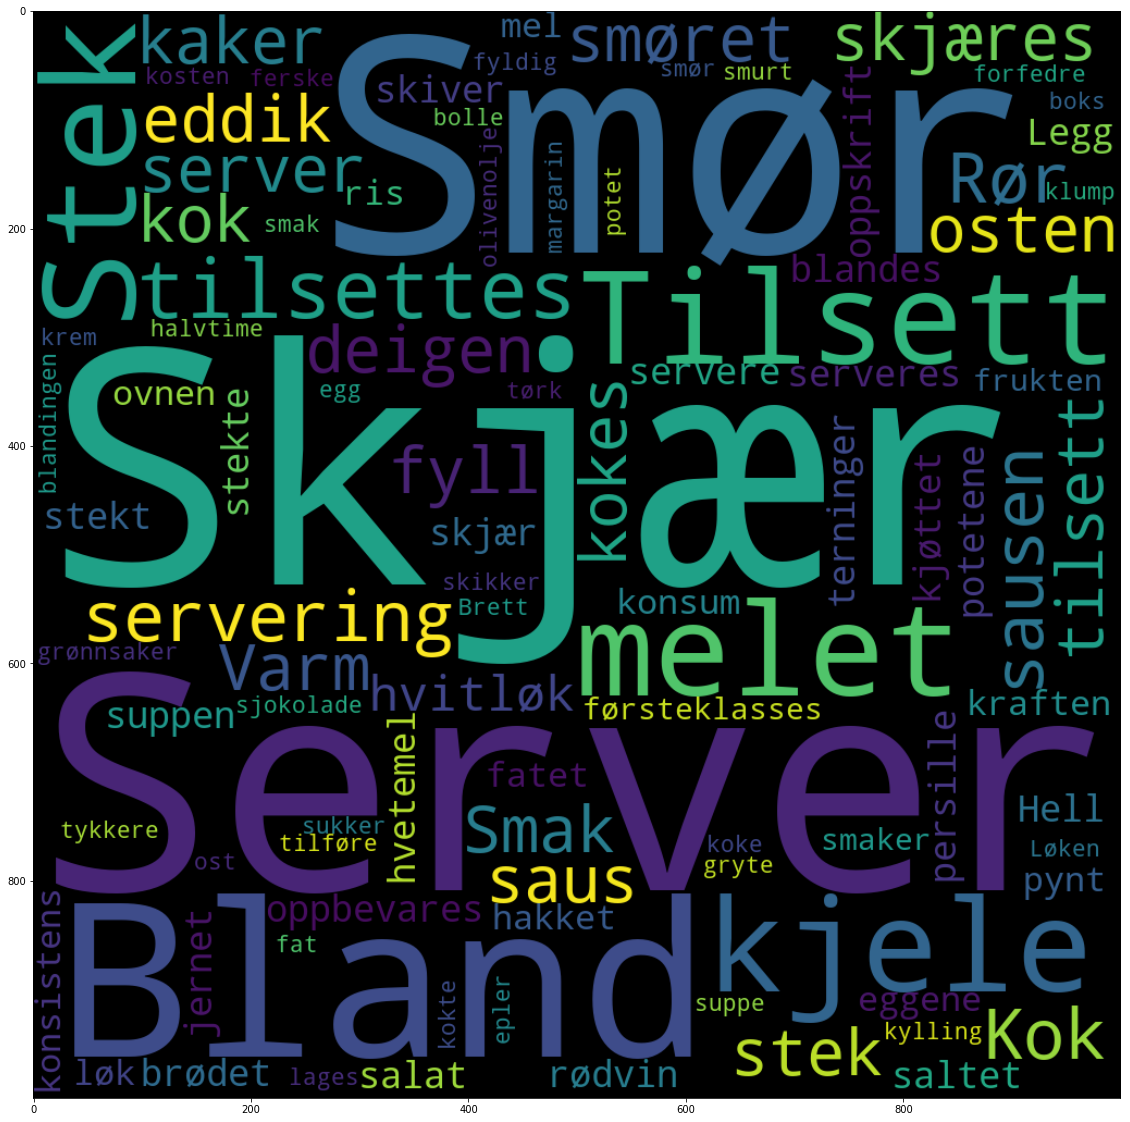

In [36]:
nb.cloud(diff[:100])

In [37]:
isdiff = (coll/totalen).sort_values(by=0, ascending = False)
isdiff.head(20)

NameError: name 'coll' is not defined

# Dokument-term-matriser

In [ ]:
# hent term-matrisen med kommandoen nb.get_corpus_text( ... liste av urner ...)
dtm = nb.get_corpus_text([x[0] for x in _27])

In [ ]:
nb.heatmap(dtm.sort_values(by = dtm.columns[1], ascending = False)[:50])

# Analyse - viktigste ord

In [ ]:
korpus = nb.Corpus(ddk='641%', period = (1990, 2010))

In [ ]:
korpus.difference(doc_exp = 1.1, freq_exp = 1.1)

In [ ]:
nb.cloud(korpus.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

In [ ]:
korpus1 = nb.Corpus(ddk='700%', period = (1990, 2010))

In [ ]:
korpus1.difference(doc_exp = 1.1, freq_exp = 1.1)

In [ ]:
nb.cloud(korpus1.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

In [ ]:
korpus2 = nb.Corpus(ddk='230%', period = (1990, 2010))

In [ ]:
korpus2.difference(doc_exp = 1.1, freq_exp = 1.1)

In [ ]:
nb.cloud(korpus2.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

In [ ]:
korpus3 = nb.Corpus(ddk='004%', period = (1990, 2010))

In [ ]:
nb.cloud(korpus3.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])